In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


predicted peak:     0.3989422804014327
calculated peak:    0.3997401649622356


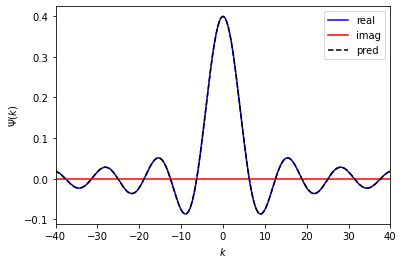

In [187]:
# Example using FFT to approximate a Fourier Transform of a Sinc Function:

a=20
N=10000

# square well of width 2*b
b=0.5
def f(x):
    if (x>2*b):
        return 0
    return sqrt(1/(2*b))
vf = np.vectorize(f)
x = np.arange(0,a,a/N)
y = vf(x)

g=np.fft.fft(y)
# multiply the FFT "frequencies" by the 2pi/(a/N) to correctly normalize the wavenumbers:
k = np.fft.fftfreq(y.size)*2*pi*N/a
# change the order of the array so frequencies increase monotonically
g = np.fft.fftshift(g)
k = np.fft.fftshift(k)
# apply the phase factor to shift back to potential that is centered at x=0:
p = np.exp(1j*k*b)
g = np.multiply(g,p)

gr = 1/sqrt(2*np.pi)*(a/N)*np.real(g)
gi = 1/sqrt(2*np.pi)*(a/N)*np.imag(g)

plot(k,gr,"b-",label="real")
plot(k,gi,"r-",label="imag")

kf = np.linspace(-100,100,1000)
pred = sqrt(b/pi)*np.sinc(kf*b/np.pi)

plot(kf,pred,"k--",label="pred")
plt.xlim(-40,40)
plt.xlabel("$k$")
plt.ylabel("$\Psi(k)$")
plt.legend()


print("predicted peak:    ", sqrt(b/pi))
print("calculated peak:   ", np.max(gr))


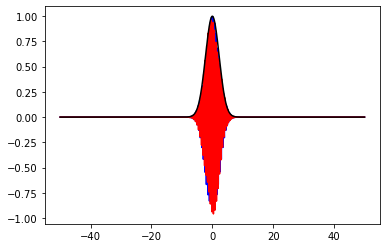

In [197]:
# Gaussian Example

def f(x):
    return np.exp(-x**2/10.0)*np.exp(1j*50*x)

xf = np.linspace(-50,50,1000)
plt.plot(xf,np.real(f(xf)),"b-")
plt.plot(xf,np.imag(f(xf)),"r-")
plt.plot(xf,np.absolute(f(xf)),"k-")


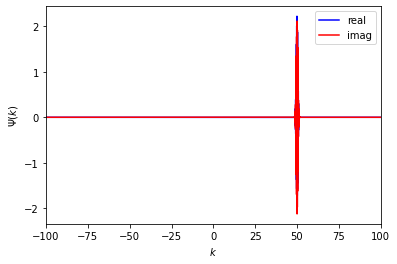

In [198]:
#Example using FFT to approximate the Fourier Transform of the above defined function:

x0=-100
a=200
N=10000

x = np.arange(x0,x0+a,a/N)
y = f(x+80)

G=np.fft.fft(y)
#multiply the FFT "frequencies" by the 2pi/(a/N) to correctly normalize the wavenumbers:
K= np.fft.fftfreq(y.size)*2*pi*N/a
#change the order of the array so frequencies increase monotonically
g = np.fft.fftshift(G)
k = np.fft.fftshift(K)
#apply the phase factor to shift back to potential that is centered at x=0:
p = np.exp(1j*k*x0)
g = np.multiply(g,p)

gr = 1/sqrt(2*np.pi)*(a/N)*np.real(g)
gi = 1/sqrt(2*np.pi)*(a/N)*np.imag(g)

plot(k,gr,"b-",label="real")
plot(k,gi,"r-",label="imag")

#kf = np.linspace(-100,100,1000)
#pred = sqrt(b/pi)*np.sinc(kf*b/np.pi)
#plot(kf,pred,"k--",label="pred")
plt.xlim(-100,100)
plt.xlabel("$k$")
plt.ylabel("$\Psi(k)$")
plt.legend()


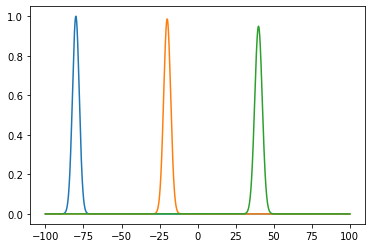

In [199]:
# inverse Fourier Transform:

t = 0
P = np.exp(-1j*K**2*t)
E = np.multiply(G,P)
y = np.fft.ifft(E)
plt.plot(x,np.absolute(y))

t = 0.6
P = np.exp(-1j*K**2*t)
E = np.multiply(G,P)
y = np.fft.ifft(E)
plt.plot(x,np.absolute(y))


t = 1.2
P = np.exp(-1j*K**2*t)
E = np.multiply(G,P)
y = np.fft.ifft(E)
plt.plot(x,np.absolute(y))


    